# Employee Turn Over

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PATH_DATA='../data/'

## Get The data

In [3]:
data_churn=pd.read_csv(PATH_DATA+'churn.csv')
data_comment=pd.read_csv(PATH_DATA+'commentInteractions.csv')
data_votes=pd.read_csv(PATH_DATA+'votes.csv')
data_comment_cln1=pd.read_csv(PATH_DATA+'comments_clean_anonimized.csv')

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# len(data_churn.employee_company.unique())

In [5]:
## Happy today?
data_votes.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


In [6]:
data_votes['employee_company']=data_votes.employee.astype(str)+'_'+data_votes.companyAlias

In [7]:
# len(data_votes.employee_company.unique())

In [8]:
len(data_votes.companyAlias.unique())

37

In [9]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [10]:
data_comment.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d


In [11]:
data_churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [12]:
len(data_churn.employee.unique())

1002

In [13]:
data_churn.shape

(4847, 5)

## Exploration Data Analysis

## Feature Extraction

Level Employee Features
* hitung jumlah vote selain "4"
* hitung berapa kali vote
* hitung berapa kali comment saat Pagi --> 6-10
* hitung berapa kali comment saat Siang --> 10-14
* hitung berapa kali comment saat Sore --> 14-18
* hitung berapa kali comment saat Malam --> 18-22
* avg comment length
* Recency of Employee
* Jumlah Comment di dislike


#### Hitung jumlah vote selain "4"

In [14]:
data_votes.head()

,employee,companyAlias,voteDate,vote,employee_company
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,31_56aec740f1ef260003e307d6
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,33_56aec740f1ef260003e307d6
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,79_56aec740f1ef260003e307d6
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,94_56aec740f1ef260003e307d6
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2,16_56aec740f1ef260003e307d6


In [15]:
data_votes['is_not_4']=(data_votes.vote!=4).astype(int)

In [16]:
data_votes.head()

,employee,companyAlias,voteDate,vote,employee_company,is_not_4
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,31_56aec740f1ef260003e307d6,0
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,33_56aec740f1ef260003e307d6,0
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,79_56aec740f1ef260003e307d6,0
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,94_56aec740f1ef260003e307d6,0
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2,16_56aec740f1ef260003e307d6,1


In [17]:
feat_1=data_votes.groupby(['employee_company']).is_not_4.sum().reset_index()

In [18]:
feat_1.head()

,employee_company,is_not_4
0,100_53a2dd43e4b01cc02f1e9011,247
1,100_54e52607e4b01191dc064966,164
2,100_5641f96713664c000332c8cd,83
3,100_56aec740f1ef260003e307d6,0
4,100_56e2a905e3b6fe0003e32855,1


#### Berapa Kali Vote

In [19]:
feat_2=data_votes.groupby(['employee_company']).vote.size().reset_index()

In [20]:
feat_2.head()

,employee_company,vote
0,100_53a2dd43e4b01cc02f1e9011,247
1,100_54e52607e4b01191dc064966,169
2,100_5641f96713664c000332c8cd,102
3,100_56aec740f1ef260003e307d6,187
4,100_56e2a905e3b6fe0003e32855,4


### hitung berapa kali comment (Pagi, Siang, Sore, Malam)

In [21]:
data_comment_cln1['employee_company']=data_comment_cln1.employee.astype(str)+'_'+data_comment_cln1.companyAlias

In [22]:
data_comment_cln1.shape

(82756, 8)

In [23]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,employee_company
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017,307_56aec740f1ef260003e307d6
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017,382_56aec740f1ef260003e307d6
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017,172_56aec740f1ef260003e307d6
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017,135_56aec740f1ef260003e307d6
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017,225_56aec740f1ef260003e307d6


In [24]:
data_comment_cln1['commentDate2']=pd.to_datetime(data_comment_cln1.commentDate)

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [25]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,employee_company,commentDate2
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017,307_56aec740f1ef260003e307d6,2017-03-20 19:00:17
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017,382_56aec740f1ef260003e307d6,2017-03-20 18:55:16
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017,172_56aec740f1ef260003e307d6,2017-03-20 16:44:02
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017,135_56aec740f1ef260003e307d6,2017-03-20 16:06:08
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017,225_56aec740f1ef260003e307d6,2017-03-20 14:30:50


In [26]:
data_comment_cln1['hour']=data_comment_cln1.commentDate2.dt.hour

In [27]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,employee_company,commentDate2,hour
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017,307_56aec740f1ef260003e307d6,2017-03-20 19:00:17,19.0
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017,382_56aec740f1ef260003e307d6,2017-03-20 18:55:16,18.0
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017,172_56aec740f1ef260003e307d6,2017-03-20 16:44:02,16.0
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017,135_56aec740f1ef260003e307d6,2017-03-20 16:06:08,16.0
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017,225_56aec740f1ef260003e307d6,2017-03-20 14:30:50,14.0


In [28]:
def hour_type(hour):
    if hour >= 6 and hour < 10:
        return 'pagi'
    elif hour >= 10 and hour < 14:
        return 'siang'
    elif hour >= 14 and hour < 18:
        return 'sore'
    elif hour >= 18 and hour < 22:
        return 'malam'
    else:
        return 'others'

In [29]:
data_comment_cln1['hour_types']=data_comment_cln1.hour.apply(hour_type)

In [30]:
XX=data_comment_cln1.hour_types.value_counts()
XX/XX.sum()

siang     0.260646
malam     0.227706
sore      0.215948
pagi      0.195647
others    0.100053
Name: hour_types, dtype: float64

In [31]:
feat_3=data_comment_cln1.groupby(['employee_company','hour_types']).commentId.size().unstack().reset_index().drop(['others'],axis=1).fillna(0)
feat_3.head()

hour_types,employee_company,malam,pagi,siang,sore
0,-100_5370af43e4b0cff95558c12a,0.0,0.0,2.0,12.0
1,-100_54e52607e4b01191dc064966,0.0,0.0,3.0,0.0
2,-101_5370af43e4b0cff95558c12a,0.0,0.0,0.0,2.0
3,-101_54e52607e4b01191dc064966,0.0,0.0,0.0,2.0
4,-102_54e52607e4b01191dc064966,2.0,0.0,0.0,2.0


#### avg comment length

In [32]:
len(data_comment_cln1[data_comment_cln1.txt.isnull()])

217

In [33]:
data_comment_cln1.txt=data_comment_cln1.txt.fillna('')

In [34]:
data_comment_cln1['lenght_txt']=data_comment_cln1.txt.apply(lambda x : len(x))

In [35]:
feat_4=data_comment_cln1.groupby('employee_company').lenght_txt.mean().reset_index()

In [36]:
feat_4.head()

,employee_company,lenght_txt
0,-100_5370af43e4b0cff95558c12a,40.285714
1,-100_54e52607e4b01191dc064966,42.666667
2,-101_5370af43e4b0cff95558c12a,10.000000
3,-101_54e52607e4b01191dc064966,85.000000
4,-102_54e52607e4b01191dc064966,29.000000


#### Recency of Employee

In [37]:
data_churn['employee_company']=data_churn.employee.astype(str)+'_'+data_churn.companyAlias

In [38]:
data_churn['lastParticipationDate2']=pd.to_datetime(data_churn.lastParticipationDate)

In [39]:
data_churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,employee_company,lastParticipationDate2
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True,512_56aec740f1ef260003e307d6,2017-02-23 12:48:04
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False,-2_56aec740f1ef260003e307d6,2017-01-18 14:00:55
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True,2_56aec740f1ef260003e307d6,2017-03-17 01:00:00
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False,487_56aec740f1ef260003e307d6,2016-11-19 15:02:14
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True,3_56aec740f1ef260003e307d6,2017-02-16 01:00:00


In [40]:
data_churn.lastParticipationDate2.max()

Timestamp('2017-03-20 21:25:54')

In [41]:
data_churn['recency']=(data_churn.lastParticipationDate2-data_churn.lastParticipationDate2.max()).apply(lambda x : -1*x.days)

In [42]:
data_churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,employee_company,lastParticipationDate2,recency
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True,512_56aec740f1ef260003e307d6,2017-02-23 12:48:04,26
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False,-2_56aec740f1ef260003e307d6,2017-01-18 14:00:55,62
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True,2_56aec740f1ef260003e307d6,2017-03-17 01:00:00,4
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False,487_56aec740f1ef260003e307d6,2016-11-19 15:02:14,122
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True,3_56aec740f1ef260003e307d6,2017-02-16 01:00:00,33


In [43]:
XX=data_churn.groupby('employee_company').size()
weird_data=XX[XX>1].index.tolist()

In [44]:
data_churn1=data_churn[~(data_churn.employee_company.isin(weird_data))]

In [45]:
# data_churn[data_churn.employee_company=='118_54e52607e4b01191dc064966']

## Feature Engineering

In [46]:
data_churn1.shape

(4769, 8)

In [47]:
len(data_churn1.employee_company.unique())

4769

In [48]:
data_train0=data_churn1[['employee_company','employee','companyAlias','recency','stillExists']]

In [49]:
feat_list=[feat_1,feat_2,feat_3,feat_4]
for f in feat_list:
    data_train0=pd.merge(data_train0,f,on='employee_company',how='left')

In [50]:
data_train0.shape

(4769, 12)

In [51]:
data_train0.head()

,employee_company,employee,companyAlias,recency,stillExists,is_not_4,vote,malam,pagi,siang,sore,lenght_txt
0,512_56aec740f1ef260003e307d6,512,56aec740f1ef260003e307d6,26,True,3.0,4.0,0.0,0.0,2.0,2.0,114.500000
1,-2_56aec740f1ef260003e307d6,-2,56aec740f1ef260003e307d6,62,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2_56aec740f1ef260003e307d6,2,56aec740f1ef260003e307d6,4,True,63.0,72.0,0.0,6.0,10.0,12.0,59.571429
3,3_56aec740f1ef260003e307d6,3,56aec740f1ef260003e307d6,33,True,9.0,22.0,4.0,0.0,4.0,8.0,85.555556
4,-4_56aec740f1ef260003e307d6,-4,56aec740f1ef260003e307d6,134,False,NaN,NaN,2.0,2.0,6.0,10.0,54.181818


In [52]:
data_train0=data_train0.fillna(0)

In [53]:
data_train0.head()

,employee_company,employee,companyAlias,recency,stillExists,is_not_4,vote,malam,pagi,siang,sore,lenght_txt
0,512_56aec740f1ef260003e307d6,512,56aec740f1ef260003e307d6,26,True,3.0,4.0,0.0,0.0,2.0,2.0,114.500000
1,-2_56aec740f1ef260003e307d6,-2,56aec740f1ef260003e307d6,62,False,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,2_56aec740f1ef260003e307d6,2,56aec740f1ef260003e307d6,4,True,63.0,72.0,0.0,6.0,10.0,12.0,59.571429
3,3_56aec740f1ef260003e307d6,3,56aec740f1ef260003e307d6,33,True,9.0,22.0,4.0,0.0,4.0,8.0,85.555556
4,-4_56aec740f1ef260003e307d6,-4,56aec740f1ef260003e307d6,134,False,0.0,0.0,2.0,2.0,6.0,10.0,54.181818


In [54]:
data_train0.isnull().sum()

employee_company    0
employee            0
companyAlias        0
recency             0
stillExists         0
is_not_4            0
vote                0
malam               0
pagi                0
siang               0
sore                0
lenght_txt          0
dtype: int64

(x-Mx)/Sx

In [55]:
data_train1=data_train0.copy()

In [56]:
data_train1.shape

(4769, 12)

In [57]:
feat_stand='recency'

for feat_stand in ['recency','is_not_4','vote','malam','pagi','siang','sore','lenght_txt']:
    data_stand=data_train0[['employee_company','employee','companyAlias']+[feat_stand]]
    data_stand_mean=data_stand.groupby('companyAlias')[feat_stand].mean().reset_index()
    data_stand_mean.columns=['companyAlias',feat_stand+'_mean']
    data_stand_std=data_stand.groupby('companyAlias')[feat_stand].std().reset_index()
    data_stand_std.columns=['companyAlias',feat_stand+'_std']

    print(data_stand.shape,data_train1.shape)

    data_stand=pd.merge(data_stand,data_stand_mean,on='companyAlias',how='left')
    data_stand=pd.merge(data_stand,data_stand_std,on='companyAlias',how='left')
    print(data_stand.shape,data_train1.shape)


    data_stand[feat_stand+'_standard']=(data_stand[feat_stand]-data_stand[feat_stand+'_mean'])/data_stand[feat_stand+'_std']
    print(data_stand.shape,data_train1.shape)


    feat_standard=data_stand[['employee_company',feat_stand+'_standard']]
    print(feat_standard.shape,data_train1.shape)

    data_train1=pd.merge(data_train1,feat_standard,on='employee_company',how='left')
    print(data_train1.shape)

(4769, 4) (4769, 12)
(4769, 6) (4769, 12)
(4769, 7) (4769, 12)
(4769, 2) (4769, 12)
(4769, 13)
(4769, 4) (4769, 13)
(4769, 6) (4769, 13)
(4769, 7) (4769, 13)
(4769, 2) (4769, 13)
(4769, 14)
(4769, 4) (4769, 14)
(4769, 6) (4769, 14)
(4769, 7) (4769, 14)
(4769, 2) (4769, 14)
(4769, 15)
(4769, 4) (4769, 15)
(4769, 6) (4769, 15)
(4769, 7) (4769, 15)
(4769, 2) (4769, 15)
(4769, 16)
(4769, 4) (4769, 16)
(4769, 6) (4769, 16)
(4769, 7) (4769, 16)
(4769, 2) (4769, 16)
(4769, 17)
(4769, 4) (4769, 17)
(4769, 6) (4769, 17)
(4769, 7) (4769, 17)
(4769, 2) (4769, 17)
(4769, 18)
(4769, 4) (4769, 18)
(4769, 6) (4769, 18)
(4769, 7) (4769, 18)
(4769, 2) (4769, 18)
(4769, 19)
(4769, 4) (4769, 19)
(4769, 6) (4769, 19)
(4769, 7) (4769, 19)
(4769, 2) (4769, 19)
(4769, 20)


In [58]:
len(data_train1.employee_company.unique())

4769

In [59]:
# data_train1[data_train1.pagi_standard.isnull()]

In [60]:
data_train1['target']=data_train1['stillExists'].astype(int)

In [61]:
feature_used=['recency','is_not_4','vote','malam','pagi','siang','sore','lenght_txt']
feature_used=[f+'_standard' for f in feature_used]
target='target'

In [62]:
## Benchmark
data_train1[target].mean()

0.7695533654854267

# Modelling

In [63]:
len(data_train1)*0.8

3815.2000000000003

In [64]:
data_train1=data_train1.fillna(0)

In [65]:
dtrain=data_train1.sample(3815,random_state=342)
dtest=data_train1[~(data_train1.employee_company.isin(dtrain.employee_company.tolist()))]


In [66]:
Xtrain=dtrain[feature_used]
Ytrain=dtrain[target]

Xtest=dtest[feature_used]
Ytest=dtest[target]

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
model=RandomForestClassifier(max_depth=8)

In [86]:
model.fit(Xtrain,Ytrain)

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
accuracy_score(Ytrain,model.predict(Xtrain))

0.9294888597640891

In [77]:
accuracy_score(Ytest,model.predict(Xtest))

0.9339622641509434

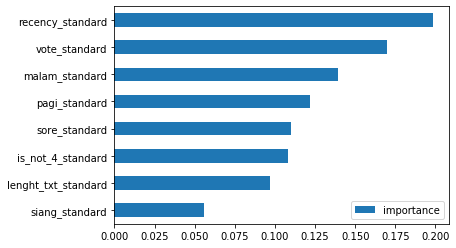

In [78]:
pd.DataFrame(model.feature_importances_,columns=['importance'],index=feature_used).sort_values('importance').plot(kind='barh')

## Hyper Parameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
model=RandomForestClassifier()
param={'max_depth':[10,20,30], 
       'min_samples_split':[10,20], 
       'min_samples_leaf':[8,16]}

In [105]:
model_grid=GridSearchCV(model,param,cv=5)

In [106]:
model_grid.fit(Xtrain,Ytrain)

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30], 'min_samples_split': [10, 20], 'min_samples_leaf': [8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
model_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
model_grid.best_score_

0.9045871559633027

In [109]:
accuracy_score(Ytest,model_grid.predict(Xtest))

0.9287211740041929

## Evaluation

In [110]:
from sklearn.metrics import confusion_matrix

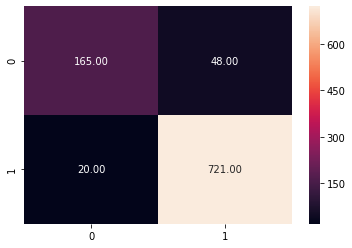

In [114]:
sns.heatmap(confusion_matrix(Ytest,model_grid.predict(Xtest)),annot=True,fmt='.2f')

In [116]:
precision=(721)/(48+721)
precision

0.9375812743823146

In [118]:
recall=(721)/(20+721)
recall

0.9730094466936572

## Ensemble

In [141]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [178]:
rf1 = RandomForestClassifier(n_estimators=8, random_state=1)
rf2 = BaggingClassifier(base_estimator=rf1, n_estimators=200)

# eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')
# eclf1 = eclf1.fit(Xtrain, Ytrain)

L1=time.time()
rf1.fit(Xtrain, Ytrain)
rf2.fit(Xtrain, Ytrain)
print(time.time()-L1)

4.791186094284058


In [179]:
accuracy_score(Ytrain,rf1.predict(Xtrain))

0.9892529488859764

In [180]:
accuracy_score(Ytrain,rf2.predict(Xtrain))

0.9764089121887287

In [181]:
accuracy_score(Ytest,rf1.predict(Xtest))

0.9203354297693921

In [182]:
accuracy_score(Ytest,rf2.predict(Xtest))

0.9318658280922432

## Save Model

In [165]:
from sklearn.externals import joblib

In [167]:
joblib.dump(rf2,'../model/employee_churn_model_v1.pkl')

['../model/employee_churn_model_v1.pkl']

In [168]:
model1=joblib.load('../model/employee_churn_model_v1.pkl')

In [173]:
# model1.predict(Xtest)

In [174]:
# rf2

In [175]:
import time